<h1>Project Work 1 - The Glass Dataset</h1>

<h2>Introduction</h2>

In this project work, we will use the Glass dataset. This is a multi-classification problem, where we want to determine the type of glass based on its chemical composition.

The <b>attributes</b> are: <b>RI</b>: refractive index, <b>Na</b>: Sodium, <b>Mg</b>: Magnesium, <b>Al</b>: Aluminum, <b>Si</b>: Silicon, <b>K</b>: Potassium, <b>Ca</b>: Calcium, <b>Ba</b>: Barium, <b>Fe</b>: Iron.

Therefore, we have 9 attributes.

<h3>Goals</h3>

We will compare the performance of three classifiers:
<ul>
    <li>K-Nearest Neighbors (k-NN)</li>
    <li>Gaussian Naive Bayes (NB)</li>
    <li>Random Guess (RG)</li>
</ul>

Considering the following metrics:

<ul>
    <li>Precision</li>
    <li>Recall</li>
    <li>Accuracy</li>
    <li>F1</li>
</ul>


<h2>The Glass Dataset</h2>

<h3>Exploration</h3>

First, we will import the main Python librearies needed for this problem.

In [3]:
import pandas as pd
import numpy as np
import scipy as sc
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn import dummy
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

Then, we upload the dataset and explore its structure.

In [7]:
#Step 1. Upload the dataset
path = "glass.csv"
db = pd.read_csv(path)

In [8]:
#Step 2. Explore the dataset structure
# We use the head() method to return the first n rows (default n = 5).
db.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
#Step 3. We use the info() method to return a description of the database.
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
#Step 4: We use the value_counts() method to find out how many classes we have, and whether the dataset is balanced or not.
db["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0dedc590>]],
      dtype=object)

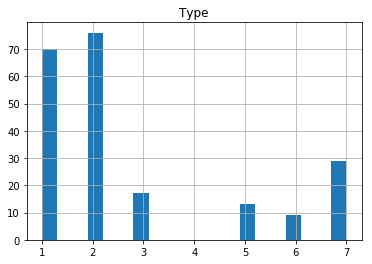

In [11]:
#Step 5: we will display the histogram of the classes
db.hist("Type",bins=20)

<h3>Visualization</h3>

We will visualize the data using histograms to find out the distribution of the variables in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a13941110>,
      dtype=object)

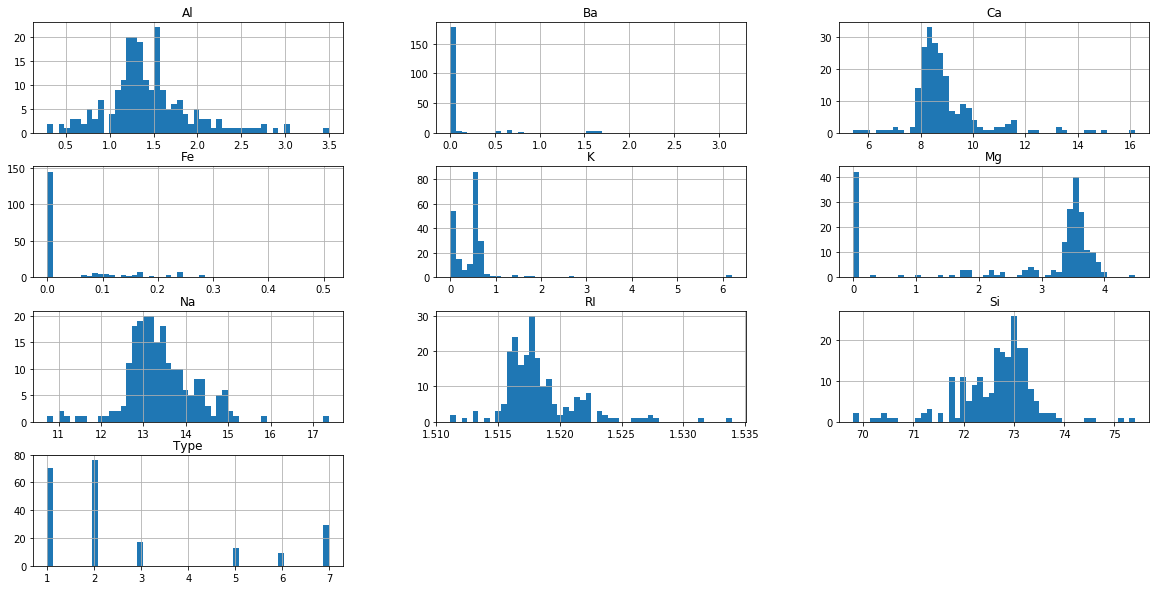

In [12]:
db.hist(bins=50, figsize=(20,10))

<h2>Describe the dataset</h2>

1. <b>How many classes has the data set?</b>
        The dataset has 6 classes. 
2. <b>Does the data set contain null-values? If yes, how many?</b>   
        The dataset does not contain null values.
3. <b>How many instances has each class? Include the histogram of the classes.</b>
        Class 1 has 70 instances, Class 2 has 76 instances, class 3 has 17 instances, class 4 has 0 instances, class 5 has 13 instances, class 6 has 9 instances, class 7 has 29 instances. The histogram of the classes is pictured above.
4. <b>Is the data set balanced? If not, which is the class with less number of instances?</b>
        The dataset is not balanced. The class with the least number of instances is class 6 with 9 instances.
5. <b>Describe the distribution of the variables of the dataset.</b>
        We can see that the variables Al, Na, RI, Ca and Si have a distribution that is mostly similar to a normal distribution. The variable Mg and K have two peaks, one of which is at 0. The variables Ba and Fe have both a big peak at 0.

<h2>Implement the Classification Pipeline</h2>

<b>1. Based on the size of the data set, which of the train-test sets divisions techniques we have seen, would you use? Explain your reasons and implement the one you think it is the most appropriate to this problem. If you chose the random split, use the test set size equal to the 25% of the dataset and the random seed equal to 8. If you chose the cross-validation algorithm, implement a 5-fold cross validation using 8 as random seed.</b>

    Since the dataset is not very large (214 instances), the random split is not suitable because a single split would be incapable of creating a satisfactory variance in the estimates. Therefore, we have decided to use the cross-validation technique.



In [13]:
shape = db.shape
array = db.values

# Divide the dataset into X and Y
X = array[:, 0:shape[1] - 1]
y = array[:, shape[1] - 1]

# 5 fold cross validation
kf = KFold(n_splits=5,random_state=8, shuffle=True)
kf.get_n_splits(X)

# we divide the datasets in 5 folds, we use 8 as seed for the random generator and we shuffle the elements
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

('TRAIN:', array([  2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  28,  29,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  79,  81,  82,  83,  84,  85,  86,  87,  89,  90,
        91,  92,  93,  95,  96,  98,  99, 102, 104, 105, 107, 108, 109,
       110, 111, 112, 113, 115, 116, 118, 119, 120, 121, 122, 123, 125,
       126, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140,
       142, 143, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156,
       158, 159, 160, 163, 165, 167, 169, 170, 171, 173, 175, 176, 177,
       178, 179, 180, 181, 184, 185, 186, 187, 188, 189, 191, 192, 193,
       194, 195, 196, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209,
       211, 213]), 'TEST:', array([  0,   1,   5,  23

<b>2. Implement a Naive Base, k-NN and Random Guess models with the default parameters. Do not use features normalization.</b>

In [14]:
#first I implement the NB Gaussian Classifier

clfNB = GaussianNB()
for train_index, test_index in kf.split(X):
    clfNB.fit(X_train, y_train)
    
#then I implement the k-NN classifier

neigh = KNeighborsClassifier()
for train_index, test_index in kf.split(X):
    neigh.fit(X_train, y_train)
    
#then I implement the random guess model
randomguess =  DummyClassifier();
for train_index, test_index in kf.split(X):
    randomguess.fit(X_train, y_train)

<b> Which of the models present the highest accuracy? Which of the models present the highest precision (use the "scoring" = precision weighted)? Which of the models present the highest ("scoring" = recall weighted)? Which of the models present the  highest F1 ("scoring" = f1 weighted)? If your aim was to have a smallnumber of False Negatives (FN), which of the models would you pick? Why?</b>

In [15]:
#I calculate accuracy, precision, recall, F1 for each model

#first I do predictions
for train_index, test_index in kf.split(X):
    predictionNB = clfNB.predict(X_test)
    predictionNeigh = neigh.predict(X_test)
    predictionRand = randomguess.predict(X_test)
    
#accuracy

accuracyNB = []
accuracyNeigh = []
accuracyRand = []

for train_index, test_index in kf.split(X):
    accNB=accuracy_score(y_test, predictionNB)
    accuracyNB.append(accNB)
    
    accNeigh=accuracy_score(y_test,predictionNeigh)
    accuracyNeigh.append(accNeigh)
    
    accRand=accuracy_score(y_test,predictionRand)
    accuracyRand.append(accRand)
    
print("Accuracy for the Naive Bayes Classifier:")
print(np.mean(accuracyNB))
    
print("Accuracy for the K-Neighbours Classifier:")
print(np.mean(accuracyNeigh))

print("Accuracy for the Random Classifier:")
print(np.mean(accuracyRand))

Accuracy for the Naive Bayes Classifier:
0.47619047619047616
Accuracy for the K-Neighbours Classifier:
0.7142857142857143
Accuracy for the Random Classifier:
0.30952380952380953


In [16]:
#precision

precisionNB = []
precisionNeigh = []
precisionRand = []

for train_index, test_index in kf.split(X):
    presNB=precision_score(y_test, predictionNB, average='weighted')
    precisionNB.append(presNB)
    
    presNeigh=precision_score(y_test, predictionNeigh, average='weighted')
    precisionNeigh.append(presNeigh)
    
    presRand = precision_score(y_test, predictionRand, average='weighted')
    precisionRand.append(presRand)
    
print("Weighted Precision for the Naive Bayes Classifier:")
print(np.mean(precisionNB))
    
print("Weighted Precision for the K-Neighbours Classifier:")
print(np.mean(precisionNeigh))

print("Weighted Precision for the Random Classifier:")
print(np.mean(precisionRand))

Weighted Precision for the Naive Bayes Classifier:
0.4916666666666666
Weighted Precision for the K-Neighbours Classifier:
0.7468253968253968
Weighted Precision for the Random Classifier:
0.3240392648287385


/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
#weighted recall

recallNB = []
recallNeigh = []
recallRand = []

for train_index, test_index in kf.split(X):
    recNB = recall_score(y_test, predictionNB, average='weighted')
    recallNB.append(recNB)
    
    recNeigh=recall_score(y_test,predictionNeigh, average='weighted')
    recallNeigh.append(recNeigh)
    
    recRand = recall_score(y_test,predictionRand, average='weighted')
    recallRand.append(recRand)
    
print("Weighted Recall for the Naive Bayes Classifier:")
print(np.mean(recallNB))
    
print("Weighted Recall for the K-Neighbours Classifier:")
print(np.mean(recallNeigh))

print("Weighted Recall for the Random Classifier:")
print(np.mean(recallRand))

Weighted Recall for the Naive Bayes Classifier:
0.47619047619047616
Weighted Recall for the K-Neighbours Classifier:
0.7142857142857143
Weighted Recall for the Random Classifier:
0.30952380952380953


In [18]:
#F1

f1scoreNB = []
f1scoreNeigh = []
f1scoreRand = []

for train_index, test_index in kf.split(X):
    f1NB = f1_score(y_test, predictionNB, average='weighted')
    f1scoreNB.append(f1NB)
    
    f1Neigh=f1_score(y_test,predictionNeigh, average='weighted')
    f1scoreNeigh.append(f1Neigh)
    
    f1Rand = f1_score(y_test,predictionRand, average='weighted')
    f1scoreRand.append(f1Rand)
    
print("Weighted F1-Score for the Naive Bayes Classifier:")
print(np.mean(f1scoreNB))
    
print("Weighted F1-Score for the K-Neighbours Classifier:")
print(np.mean(f1scoreNeigh))

print("Weighted F1-Score for the Random Classifier:")
print(np.mean(f1scoreRand))

Weighted F1-Score for the Naive Bayes Classifier:
0.40437710437710433
Weighted F1-Score for the K-Neighbours Classifier:
0.7162337662337661
Weighted F1-Score for the Random Classifier:
0.3101505231940015


/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<b>1. Which of the models present the highest accuracy?</b> The k-NN model.

<b>2. Which of the models present the highest precision?</b> The k-NN model.

<b>3. Which of the models present the highest recall?</b> The k-NN model.

<b>4. Which of the models present the highest F1 score?</b> The k-NN model.

<b>5. If your aim was to have a small number of False Negatives (FN), which of the models would you pick? Why?</b> I would pick the k-NN model because it is the model with the highest recall, and the recall represents the % of positive tuples labeled as positive, therefore the higher it is, the lower is the number of false negatives.

<h2>Tune the Classifiers' Parameters</h2>

Using GridSearchCV tune the parameters of the k-NN to improve its performance. Before applying GridSearchCV, divide the dataset in train and test set using the random split.

Use the seed = 4 and the test set size = 30%. In particular verify with which of the number of neighbors among [1:100], k-NN gets the best performance, in terms of precision, recall, accuracy and F1. Which are the best number of neighbors, for these metrics? 

Report the metrics, are they increased?

In [22]:
#first I divide the dataset in train and set using the random split
#seed = 4, test set size = 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

#then I apply GridSearchCV

parameters = {'n_neighbors':[1, 100]}

clf = GridSearchCV(KNeighborsClassifier(), parameters, cv = 5)
clf.fit(X_train, y_train)

print("best parameters:", clf.best_params_)


('best parameters:', {'n_neighbors': 1})


In [24]:
# Create the pipeline
clf = make_pipeline(MinMaxScaler(), svm.SVC(kernel ='linear'))

#divide the dataset in train and set using the random split
#seed = 4, test set size = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

#then I apply GridSearchCV

param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100] }

grid = GridSearchCV(clf, param_grid, cv = 5, scoring='accuracy')

grid.fit(X_train, y_train)

print("best parameters:", grid.best_params_)


('best parameters:', {'svc__C': 10})
